## Q1. Explain the difference between linear regression and logistic regression models. Provide an example of a scenario where logistic regression would be more appropriate.

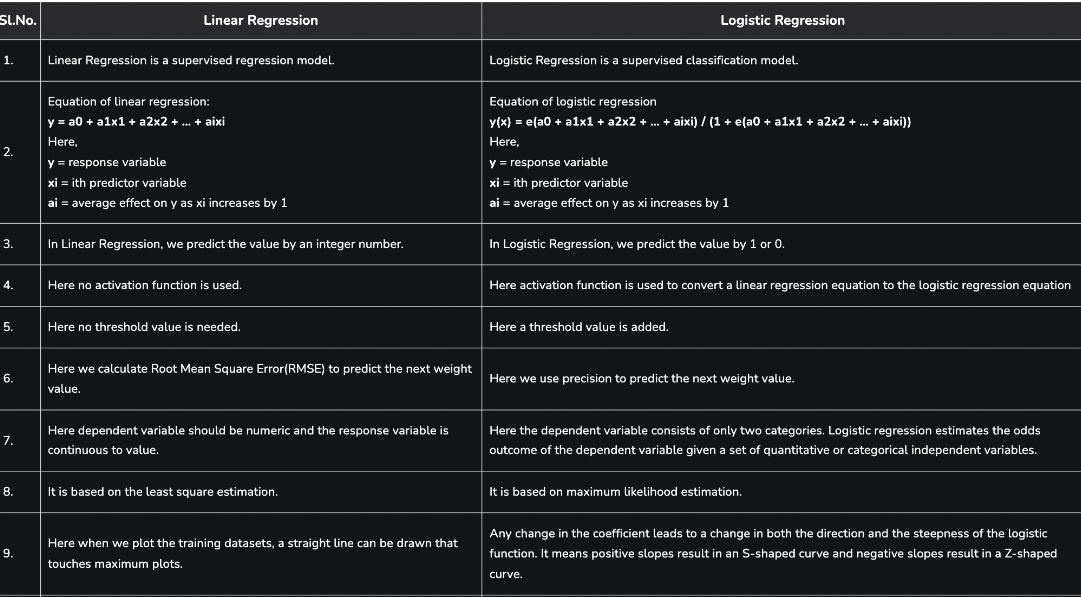

#### Email Spam Detection

Imagine you are working for an email service provider, and your task is to develop a spam filter that can classify incoming emails as either "spam" or "not spam" (ham). The goal is to automatically move spam emails to a separate spam folder, ensuring that users only see legitimate emails in their main inbox.

In this example,

- Dependent Variable (Target): The dependent variable is the classification of an email as either "spam" or "not spam." This is a binary categorical variable.

- Independent Variables (Features): You have a set of features for each email that can be used to make the classification decision. These features could include the sender's email address, subject line, the presence of certain keywords, and more. These features can be numeric, categorical, or a combination of both.

#### Logistic regression would be a suitable choice for this scenario for several reasons:

- Binary Classification: The problem involves binary classification, where you want to predict one of two possible outcomes (spam or not spam).

- Interpretability: Logistic regression provides interpretable results, making it easy to understand the relationship between the independent variables (email features) and the likelihood of an email being spam.

- Efficiency: Logistic regression is computationally efficient and can handle a large number of features and data points, making it well-suited for processing a high volume of incoming emails.

- Probability Estimation: Logistic regression also provides probability estimates, which can be useful in ranking emails by their likelihood of being spam. This helps in deciding which emails to prioritize for user review.

## Q2. What is the cost function used in logistic regression, and how is it optimized?

In logistic regression, the cost function used is often referred to as the "logistic loss" or "cross-entropy loss" function. It measures the error between the predicted probabilities and the actual binary outcomes (0 or 1). The goal in logistic regression is to minimize this cost function to find the best set of parameters (coefficients) for the model.

## Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.

Regularization is a technique used in logistic regression (and other machine learning models) to prevent overfitting, which occurs when a model fits the training data too closely, capturing noise and making it perform poorly on unseen data. Regularization adds a penalty term to the logistic regression cost function that discourages overly complex models with large coefficient values.



## Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression model?

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.


TPR (True Positive Rate) / Recall /Sensitivity = TP / (TP + FN)

Specificity = TN / (TN + FP)

FPR = 1 - Specificity 
ie,FPR = FP / (FP + TN)

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability. In fact, it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means the model has no class separation capacity whatsoever.

For more reference : https://medium.com/cits-tech/auc-roc-curve-e4bce73fbe53

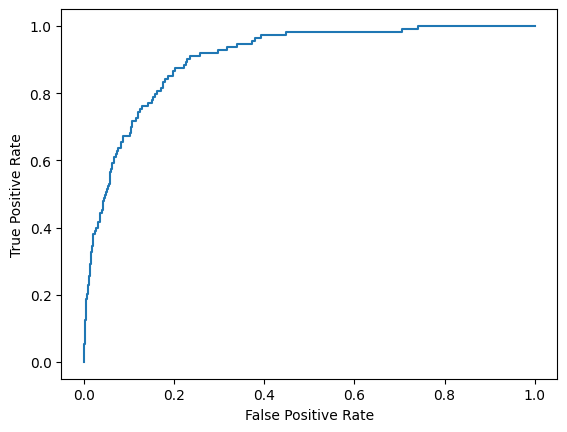

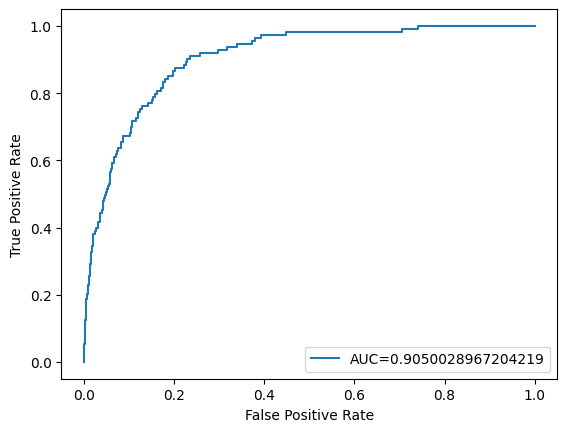

In [1]:
#Step 1:Import modules and fit logistic regression model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#Step 2: Plot the ROC Curve
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Step 3: Calculate the AUC
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Q5. What are some common techniques for feature selection in logistic regression? How do these techniques help improve the model's performance?

Feature selection is a crucial step in building a logistic regression model, as it helps identify the most relevant and informative features while discarding irrelevant or redundant ones. Effective feature selection can improve the model's performance by reducing overfitting, enhancing interpretability, and potentially speeding up training. Here are some common techniques for feature selection in logistic regression:

1. **Univariate Feature Selection:**
   - Univariate feature selection methods evaluate each feature independently in relation to the target variable. Common techniques include:
     - **Chi-Square Test:** Used for categorical target variables, it measures the independence between each feature and the target.
     - **F-Test (ANOVA):** Useful for numerical features and categorical target variables, it assesses whether there is a significant difference in means between categories.
     - **Mutual Information:** Measures the dependency between a feature and the target variable.

2. **Feature Importance from Tree-Based Models:**
   - Tree-based models like Random Forest or Gradient Boosting can provide feature importance scores. Features with higher importance scores are considered more relevant. This is especially useful when you want to identify important features in complex datasets.

3. **L1 Regularization (Lasso):**
   - As mentioned earlier, L1 regularization encourages sparsity by driving some coefficient values to zero. Features corresponding to non-zero coefficients are selected as important, while those with zero coefficients are excluded from the model.

4. **Recursive Feature Elimination (RFE):**
   - RFE is an iterative method that starts with all features and successively removes the least significant ones based on a chosen model's coefficient values or feature importance scores. This process continues until a predetermined number of features is reached.

5. **SelectKBest:**
   - SelectKBest is a technique that selects the top K features based on a scoring function, such as the F-statistic or mutual information. It allows you to specify the number of features to retain.

6. **Correlation-Based Feature Selection:**
   - This method involves calculating the correlation between each feature and the target variable. Features with high absolute correlation values are considered more relevant.

7. **Sequential Feature Selection:**
   - Sequential feature selection methods, such as forward selection and backward elimination, systematically add or remove features based on their impact on model performance. These methods can be computationally intensive but can yield good feature subsets.

### How these techniques help improve the model's performance:

- **Reduced Overfitting:** By removing irrelevant or noisy features, the model is less likely to overfit the training data and can better generalize to unseen data.
  
- **Improved Interpretability:** Fewer features make the model easier to interpret, as you can focus on the most important variables that drive predictions.

- **Reduced Training Time:** Fewer features can lead to faster model training and prediction times, which is important for large datasets or real-time applications.

- **Enhanced Model Robustness:** A model with fewer features is often more robust and less sensitive to changes in the dataset.


## Q6. How can you handle imbalanced datasets in logistic regression? What are some strategies for dealing with class imbalance?

Handling imbalanced datasets in logistic regression is crucial because when one class significantly outnumbers the other, the model may become biased toward the majority class and perform poorly on the minority class. To address class imbalance in logistic regression, consider the following strategies:

1. **Resampling Techniques:**
   - **Oversampling:** Increase the number of instances in the minority class by duplicating or generating synthetic data points. Common oversampling techniques include Random Oversampling and Synthetic Minority Over-sampling Technique (SMOTE).
   - **Undersampling:** Decrease the number of instances in the majority class by randomly removing some of its data points. Be cautious with undersampling, as it may lead to loss of valuable information.

2. **Cost-Sensitive Learning:**
   - Adjust the class weights during model training to penalize misclassifying the minority class more heavily. Most logistic regression implementations allow you to assign different weights to classes.

3. **Use Different Evaluation Metrics:**
   - Instead of using accuracy, which can be misleading in imbalanced datasets, consider metrics like precision, recall, F1-score, and the area under the ROC curve (AUC-ROC) for a more comprehensive evaluation.

4. **Threshold Adjustment:**
   - By default, logistic regression uses a threshold of 0.5 to make predictions. You can adjust this threshold to achieve a better balance between precision and recall, depending on the specific problem. Lowering the threshold increases recall (more true positives) but may decrease precision.

5. **Ensemble Methods:**
   - Ensemble methods like Random Forest and Gradient Boosting can handle class imbalance better than a standalone logistic regression model. These methods can learn from imbalanced data more effectively and improve predictive performance.

6. **Anomaly Detection Techniques:**
   - Consider treating the minority class as an anomaly detection problem, using techniques such as one-class SVM or isolation forests.

7. **Collect More Data:**
   - If possible, gather more data for the minority class to balance the dataset naturally. This is often the most effective but not always feasible solution.

8. **Generate Synthetic Data:**
   - Techniques like SMOTE create synthetic examples for the minority class by interpolating between existing data points. This can help balance the dataset and improve model performance.

9. **Different Algorithms:**
   - Explore other classification algorithms that are less sensitive to class imbalance, such as decision trees or support vector machines.

10. **Hybrid Approaches:**
    - Combine multiple techniques, such as oversampling and cost-sensitive learning, to address class imbalance from multiple angles.

You may need to experiment with different methods and evaluate their performance using relevant metrics to determine the best approach for handling class imbalance in logistic regression or any other classification model.

## Q7. Can you discuss some common issues and challenges that may arise when implementing logistic regression, and how they can be addressed? For example, what can be done if there is multicollinearity among the independent variables?

Common issues and challenges that may arrise while implementing Logistic Regression are :

1. **Overfitting or Underfitting:**
   - **Issue:** Logistic regression models can suffer from overfitting when they are too complex or underfitting when they are too simple. Overfit models perform well on training data but poorly on new data, while underfit models have limited predictive power.
   - **Solution:** Address overfitting by using techniques like regularization (L1 or L2) and cross-validation to find the right level of complexity for your model.

2. **Multicollinearity:**
   - **Issue:** Multicollinearity occurs when two or more independent variables in the model are highly correlated, making it challenging to determine each variable's individual effect on the target.
   - **Solution:** Identify and address multicollinearity by using techniques like correlation analysis, variance inflation factor (VIF) analysis, or feature selection methods to remove redundant variables.

3. **Imbalanced Datasets:**
   - **Issue:** Logistic regression can struggle with imbalanced datasets, where one class significantly outnumbers the other, leading to biased predictions.
   - **Solution:** Employ strategies for dealing with class imbalance, such as resampling techniques (oversampling, undersampling), cost-sensitive learning, or alternative evaluation metrics (precision, recall, F1-score).

4. **Non-Linearity:**
   - **Issue:** Logistic regression assumes a linear relationship between the independent variables and the log-odds of the target. When the relationship is non-linear, logistic regression may not capture it effectively.
   - **Solution:** Consider feature engineering, such as adding polynomial features or using more complex models like decision trees or support vector machines when non-linearity is a significant concern.

5. **Missing Data:**
   - **Issue:** Logistic regression typically requires complete datasets. Missing data can lead to biased results or model instability.
   - **Solution:** Address missing data by imputing missing values (e.g., mean, median, or mode imputation) or using advanced imputation techniques like multiple imputations. Carefully consider the implications of missing data on your analysis.

6. **Outliers:**
   - **Issue:** Outliers can significantly impact logistic regression coefficients and predictions.
   - **Solution:** Identify and handle outliers by visual inspection, using statistical tests, or applying robust regression techniques that are less sensitive to outliers.

7. **Model Interpretability:**
   - **Issue:** While logistic regression provides interpretable coefficients, it may not capture complex relationships as effectively as other models.
   - **Solution:** Balance interpretability and model performance by exploring feature engineering, using feature selection methods, or adopting more complex models when necessary.

8. **Feature Engineering:**
   - **Issue:** Selecting relevant features and engineering them effectively can be challenging, affecting model performance.
   - **Solution:** Invest time in data preprocessing, feature selection, and domain knowledge to engineer informative features that improve model accuracy.

9. **Data Quality:**
   - **Issue:** Poor data quality, including outliers, noise, or missing values, can lead to suboptimal model performance.
   - **Solution:** Clean and preprocess the data rigorously, address outliers and missing values, and consider data quality as a critical aspect of your modeling process.

10. **Model Evaluation:**
    - **Issue:** Choosing the appropriate evaluation metrics and ensuring the model's generalization to new data are crucial.
    - **Solution:** Use appropriate evaluation metrics based on the problem (e.g., accuracy, precision, recall, F1-score, ROC-AUC), and employ techniques like cross-validation to assess the model's generalization performance.